## **05. Pra-pemrosesan Data (Data Preprocessing)**

---

Casefolding

Cleansing

Normalization

Stopword Removal

Stemming

Tokenization

Padding

## Installing Package

In [184]:
!pip install sastrawi
!pip install emoji

## Import Library

In [185]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [186]:
checking = pd.read_csv('../02. Pengumpulan Data (Data Collection)/Dataset/check.csv')
checking

,tweet,label
0,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,non
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimi...,non
2,Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay,non
3,womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,non
4,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #Indonesi...,non
5,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,non


In [187]:
data = pd.read_csv(
    '../03. Integrasi Data (Data Integration)/Dataset_Integration.csv', 
    sep="\t"
)
data

,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
46765,@winniethewins Bisa cod atau shopee ka?,Neutral
46766,Wts / want to sell INA lfb Bornpink blackpink 2 pocket photo card holder 40.000 Bisa shopee bisa keep event (dp) bisa cod bisa live shopee Condi ?...,Neutral
46767,ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊กกี้ตัวแสบ ในราคา ฿49 - ฿299 ที่ Shopee https://t.co/fqnr74iD5g https://t.co/8BxglcP9HR,Joy
46768,Yang suka gayaCek OLEVS Jam Tangan Pria Anti Air Original Rantai Keren Terbaru Mewah Luxury Stainless Steel Watch Men Cod Jam Tangan Lelaki Couple...,Neutral


In [188]:
train_data = checking[['tweet' , 'label']]

In [189]:
train_data.reset_index(inplace=True,drop=True)
train_data

,tweet,label
0,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,non
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimi...,non
2,Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay,non
3,womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,non
4,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #Indonesi...,non
5,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,non


# Preprocessing

In [190]:
import copy

train_data_copy = copy.deepcopy(train_data)


## 01. Case Folding

### a. Lowercase

In [191]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [192]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_lowercase)

CPU times: total: 15.6 ms
Wall time: 0 ns


In [193]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #TimnasDay,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday
2,Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday
3,womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #IndonesiaFilipina #kualifikasipialadunia #TimnasIndonesia #TimnasFilipina #pssi,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 https://t.co/if6qfioqdd #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi
5,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot


In [194]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 0 ns


## 02. Cleansing

### a. Menghapus username

In [195]:
import re

In [196]:
def tweet_delete_username(tweet):

    userPattern = r'@\w+'
    

    tweet = re.sub(userPattern, '', tweet)
    
    return tweet


In [197]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 0 ns


In [198]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 https://t.co/if6qfioqdd #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 https://t.co/if6qfioqdd #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi
5,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [199]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 1.01 ms


### b. Menghapus url

In [200]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [201]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_url)

CPU times: total: 0 ns
Wall time: 1.04 ms


In [202]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 https://t.co/if6qfioqdd #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [203]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_url)

CPU times: total: 0 ns
Wall time: 1.37 ms


### c. Menghapus kelebihan huruf

In [204]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' 
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [205]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 0 ns


In [206]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [207]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 999 µs


### d. Menghapus new line dan new text

In [208]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [209]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 1.12 ms


In [210]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [211]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 0 ns


### e. Menghapus Hastag

In [212]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [213]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [214]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #timnasday,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor. #timnasday,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor.
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026 #sepakbola #indonesiafilipina #kualifikasipialadunia #timnasindonesia #timnasfilipina #pssi,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [215]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 1e+03 µs


### f. Menghapus angka

In [216]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [217]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 1.5 ms


In [218]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang + erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor.,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor.
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina 2-0 indonesia lolos ke putaran ketiga kuaifikasi piala dunia 2026,timnas indonesia vs timnas filipina - indonesia lolos ke putaran ketiga kuaifikasi piala dunia
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [219]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 0 ns


### g. Menghapus tanda baca

In [220]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [221]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 0 ns


In [222]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang + erik ten hag stay,timnas pria dan wanita menang erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor.,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina - indonesia lolos ke putaran ketiga kuaifikasi piala dunia,timnas indonesia vs timnas filipina indonesia lolos ke putaran ketiga kuaifikasi piala dunia
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [223]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 1.39 ms


### h. Menghapus Extra Spasi

In [224]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [225]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 1.08 ms


In [226]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang erik ten hag stay,timnas pria dan wanita menang erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina indonesia lolos ke putaran ketiga kuaifikasi piala dunia,timnas indonesia vs timnas filipina indonesia lolos ke putaran ketiga kuaifikasi piala dunia
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara lu fomo timnas atau emang kaga ngerti sistem pot


In [227]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 0 ns


## 03. Normalization

### Import Kamus

In [228]:
kamus_singkatan = pd.read_csv("../02. Pengumpulan Data (Data Collection)/Dataset/Kamus/kamus_singkatan2.csv",delimiter=",")
kamus_singkatan

,Unnamed: 0.1,Unnamed: 0,singkatan,kata asal
0,0,NaN,aamiin,amin
1,1,NaN,adek,adik
2,2,NaN,adlh,adalah
3,3,NaN,ad,ada
4,4,NaN,aer,air
...,...,...,...,...
1373,1572,NaN,elu,kamu
1374,1573,NaN,lo,kamu
1375,1574,NaN,lu,kamu
1376,1575,NaN,anjim,anjing


In [229]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["singkatan"][i]]=kamus_singkatan["kata asal"][i].lower().strip()
      return kamus

In [230]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'ad': 'ada',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',

In [231]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [232]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 15.6 ms
Wall time: 11.4 ms


In [233]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang erik ten hag stay,timnas pria dan wanita menang erik ten hag stay
1,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan,merasa tidak sih sekarang timnas kalau main pakai jersey putih tuh aura menangnya naik drastis beda sama sebelumnya kalau main pakai jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor
3,womensfootie_id tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tambah pemain diaspora bisa lah ini timnas putri bersaing di asia
4,timnas indonesia vs timnas filipina indonesia lolos ke putaran ketiga kuaifikasi piala dunia,timnas indonesia vs timnas filipina indonesia lolos ke putaran ketiga kuaifikasi piala dunia
5,antara lu fomo timnas atau emang kaga ngerti sistem pot,antara kamu fomo timnas atau memang kaga ngerti sistem pot


In [234]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 0 ns
Wall time: 10.3 ms


## 04. Stopword Removal

Library : Sastrawi

In [235]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [236]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 0 ns
Wall time: 997 µs


In [237]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria dan wanita menang erik ten hag stay,timnas pria wanita menang erik ten hag stay
1,merasa tidak sih sekarang timnas kalau main pakai jersey putih tuh aura menangnya naik drastis beda sama sebelumnya kalau main pakai jersey putih nih pesimis duluan,merasa sih sekarang timnas kalau main pakai jersey putih tuh aura menangnya naik drastis beda sama sebelumnya kalau main pakai jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor
3,womensfootie_id tinggal tambah pemain diaspora bisa lah ini timnas putri bersaing di asia,womensfootie_id tinggal tambah pemain diaspora lah timnas putri bersaing asia
4,timnas indonesia vs timnas filipina indonesia lolos ke putaran ketiga kuaifikasi piala dunia,timnas indonesia vs timnas filipina indonesia lolos putaran ketiga kuaifikasi piala dunia
5,antara kamu fomo timnas atau memang kaga ngerti sistem pot,kamu fomo timnas memang kaga ngerti sistem pot


In [238]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 0 ns
Wall time: 0 ns


## 05. Stemming

mpstemmer

In [239]:
!pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

!pip install python-Levenshtein

  Cloning https://github.com/ariaghora/mpstemmer.git to c:\users\temp\appdata\local\temp\pip-req-build-j5j5319s
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git 'C:\Users\TEMP\AppData\Local\Temp\pip-req-build-j5j5319s'


In [240]:
from mpstemmer import MPStemmer

def stemming_sentences(tweet):
    stemmer = MPStemmer()

    if isinstance(tweet, list):
        return [stemmer.stem(i) for i in tweet]
    else:
        return stemmer.stem(tweet)


In [241]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = stemming_sentences(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 31.2 ms
Wall time: 75.3 ms


In [242]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria wanita menang erik ten hag stay,timnas pria wanita menang erik ten hag stay
1,merasa sih sekarang timnas kalau main pakai jersey putih tuh aura menangnya naik drastis beda sama sebelumnya kalau main pakai jersey putih nih pesimis duluan,merasa sih sekarang timnas kalau main pakai jersey putih tuh aura menangnya naik drastis beda sama sebelumnya kalau main pakai jersey putih nih pesimis duluan
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor
3,womensfootie_id tinggal tambah pemain diaspora lah timnas putri bersaing asia,womensfootie_id tinggal tambah pemain diaspora lah timnas putri bersaing asia
4,timnas indonesia vs timnas filipina indonesia lolos putaran ketiga kuaifikasi piala dunia,timnas indonesia vs timnas filipina indonesia lolos putaran ketiga kuaifikasi piala dunia
5,kamu fomo timnas memang kaga ngerti sistem pot,kamu fomo timnas memang kaga ngerti sistem pot


In [243]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = stemming_sentences(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 15.6 ms
Wall time: 84 ms


## 06. Tokenization

In [244]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [245]:
def tokenization_sentences(tweet):
    if isinstance(tweet, list):
        tokenized_tweet = []
        for word in tweet:
            tokens = word_tokenize(word)
            tokenized_tweet.extend(tokens)
        return tokenized_tweet
    else:
        return word_tokenize(tweet)

In [246]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tokenization_sentences(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 0 ns
Wall time: 2 ms


In [247]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,timnas pria wanita menang erik ten hag stay,"[timnas, pria, wanita, menang, erik, ten, hag, stay]"
1,merasa sih sekarang timnas kalau main pakai jersey putih tuh aura menangnya naik drastis beda sama sebelumnya kalau main pakai jersey putih nih pesimis duluan,"[merasa, sih, sekarang, timnas, kalau, main, pakai, jersey, putih, tuh, aura, menangnya, naik, drastis, beda, sama, sebelumnya, kalau, main, pakai, jersey, putih, nih, pesimis, duluan]"
2,sejarah dicetak timnas indonesia usai ganyang filipina sty pelatih pemecah rekor,"[sejarah, dicetak, timnas, indonesia, usai, ganyang, filipina, sty, pelatih, pemecah, rekor]"
3,womensfootie_id tinggal tambah pemain diaspora lah timnas putri bersaing asia,"[womensfootie_id, tinggal, tambah, pemain, diaspora, lah, timnas, putri, bersaing, asia]"
4,timnas indonesia vs timnas filipina indonesia lolos putaran ketiga kuaifikasi piala dunia,"[timnas, indonesia, vs, timnas, filipina, indonesia, lolos, putaran, ketiga, kuaifikasi, piala, dunia]"
5,kamu fomo timnas memang kaga ngerti sistem pot,"[kamu, fomo, timnas, memang, kaga, ngerti, sistem, pot]"


In [248]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tokenization_sentences(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 15.6 ms
Wall time: 3 ms


## 07. Padding

Maksimalnya adalah 64

In [249]:
def pad_sentence(tweet, max_length=22, pad_token='<pad>'):
    if len(tweet) < max_length:
        tweet += [pad_token] * (max_length - len(tweet))
    else:
        tweet = tweet[:max_length]
    return tweet

In [250]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = pad_sentence(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
CPU times: total: 0 ns
Wall time: 1.01 ms


In [251]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[timnas, pria, wanita, menang, erik, ten, hag, stay]","[timnas, pria, wanita, menang, erik, ten, hag, stay, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
1,"[merasa, sih, sekarang, timnas, kalau, main, pakai, jersey, putih, tuh, aura, menangnya, naik, drastis, beda, sama, sebelumnya, kalau, main, pakai, jersey, putih, nih, pesimis, duluan]","[merasa, sih, sekarang, timnas, kalau, main, pakai, jersey, putih, tuh, aura, menangnya, naik, drastis, beda, sama, sebelumnya, kalau, main, pakai, jersey, putih]"
2,"[sejarah, dicetak, timnas, indonesia, usai, ganyang, filipina, sty, pelatih, pemecah, rekor]","[sejarah, dicetak, timnas, indonesia, usai, ganyang, filipina, sty, pelatih, pemecah, rekor, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
3,"[womensfootie_id, tinggal, tambah, pemain, diaspora, lah, timnas, putri, bersaing, asia]","[womensfootie_id, tinggal, tambah, pemain, diaspora, lah, timnas, putri, bersaing, asia, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
4,"[timnas, indonesia, vs, timnas, filipina, indonesia, lolos, putaran, ketiga, kuaifikasi, piala, dunia]","[timnas, indonesia, vs, timnas, filipina, indonesia, lolos, putaran, ketiga, kuaifikasi, piala, dunia, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
5,"[kamu, fomo, timnas, memang, kaga, ngerti, sistem, pot]","[kamu, fomo, timnas, memang, kaga, ngerti, sistem, pot, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"


# Saving Preposessing

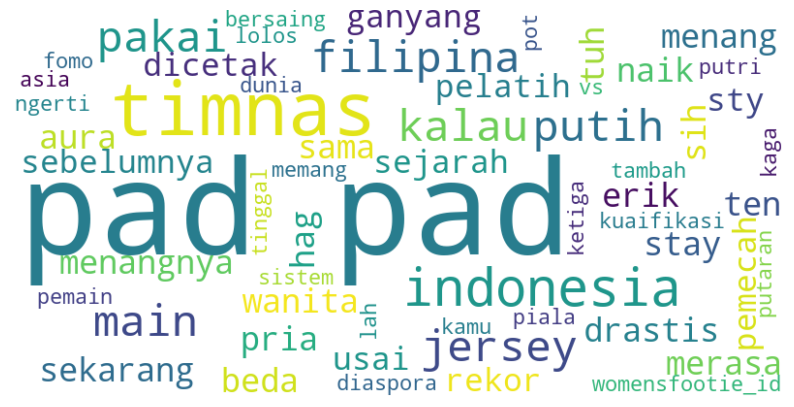

In [252]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [253]:
comparison_df = pd.DataFrame({
    'Before ': train_data2['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,NaN,"[timnas, pria, wanita, menang, erik, ten, hag, stay, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
1,NaN,"[merasa, sih, sekarang, timnas, kalau, main, pakai, jersey, putih, tuh, aura, menangnya, naik, drastis, beda, sama, sebelumnya, kalau, main, pakai, jersey, putih]"
2,NaN,"[sejarah, dicetak, timnas, indonesia, usai, ganyang, filipina, sty, pelatih, pemecah, rekor, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
3,NaN,"[womensfootie_id, tinggal, tambah, pemain, diaspora, lah, timnas, putri, bersaing, asia, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
4,NaN,"[timnas, indonesia, vs, timnas, filipina, indonesia, lolos, putaran, ketiga, kuaifikasi, piala, dunia, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
5,NaN,"[kamu, fomo, timnas, memang, kaga, ngerti, sistem, pot, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,NaN,NaN
Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay,NaN,NaN
TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,NaN,NaN
Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #IndonesiaFilipina #kualifikasipialadunia #TimnasIndonesia #TimnasFilipina #pssi,NaN,NaN


In [254]:
train_data.to_csv("./Dataset_Clean/Dataset_Clean(check).csv")